In [1138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from urllib.request import Request, urlopen
pd.options.mode.chained_assignment = None
plt.style.use('classic')
plt.style.use('seaborn-ticks')
plt.style.use('seaborn-darkgrid')
plt.style.use('dark_background')

In [1064]:
#ESS Round 8: European Social Survey Round 8 Data (2016). Data file edition 2.1. NSD - Norwegian Centre for Research Data, Norway – Data Archive and distributor of ESS data for ESS ERIC. doi:10.21338/NSD-ESS8-2016.
req = Request('http://ivanachille.com/publicdata/european-social-survey/ESS8e02.1_F1.csv')
req2 = Request('http://ivanachille.com/publicdata/european-social-survey/variables.csv')
req.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
req2.add_header('User-Agent', 'Mozilla/5.0 (X11; Ubuntu; Linux x86_64; rv:77.0) Gecko/20100101 Firefox/77.0')
content = urlopen(req)
content2 = urlopen(req2)

df = pd.read_csv(content)
vars = pd.read_csv(content2)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (164) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [1065]:
df

,name,essround,edition,proddate,idno,cntry,nwspol,netusoft,netustm,ppltrst,pplfair,pplhlp,polintr,psppsgva,actrolga,psppipla,cptppola,trstprl,trstlgl,trstplc,trstplt,trstprt,trstep,trstun,vote,prtvtbat,prtvtcbe,prtvtfch,prtvtdcz,prtvede1,prtvede2,prtvtfee,prtvtdes,prtvtdfi,prtvtcfr,prtvtbgb,prtvtehu,prtvtbie,prtvtcil,prtvtbis,...,anctry1,anctry2,ipcrtiv,imprich,ipeqopt,ipshabt,impsafe,impdiff,ipfrule,ipudrst,ipmodst,ipgdtim,impfree,iphlppl,ipsuces,ipstrgv,ipadvnt,ipbhprp,iprspot,iplylfr,impenv,imptrad,impfun,region,regunit,intewde,inwdds,inwmms,inwyys,inwshh,inwsmm,inwdde,inwmme,inwyye,inwehh,inwemm,inwtm,dweight,pspwght,pweight
0,ESS8e02_1,8,2.1,01.12.2018,1,AT,120,4,180,8,8,3,1,2,2,2,3,6,7,0,2,8,9,10,3,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11070,555555,2,6,1,2,2,3,5,1,2,4,3,1,2,6,3,6,1,1,1,6,3,AT13,2,NaN,5,12,2016,7,37,5,12,2016,8,33,50.0,0.611677,1.178496,0.370393
1,ESS8e02_1,8,2.1,01.12.2018,2,AT,120,5,120,6,6,5,1,1,3,2,3,5,4,3,3,4,6,7,3,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11070,555555,3,6,2,3,5,3,5,3,4,3,2,3,3,4,5,5,2,2,2,5,5,AT13,2,NaN,25,11,2016,9,39,25,11,2016,11,10,86.0,1.223354,0.899472,0.370393
2,ESS8e02_1,8,2.1,01.12.2018,4,AT,30,2,6666,5,6,4,3,2,2,2,2,3,5,9,3,3,4,5,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11010,555555,3,5,2,4,1,6,5,2,3,2,2,3,6,1,6,3,3,1,2,2,3,AT31,2,NaN,22,11,2016,17,17,22,11,2016,18,0,38.0,0.389058,0.315753,0.370393
3,ESS8e02_1,8,2.1,01.12.2018,6,AT,30,5,120,6,5,6,2,3,2,3,4,1,1,2,1,1,1,1,7,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,11010,555555,2,3,2,2,2,3,3,2,2,2,2,3,3,2,3,4,2,2,3,2,2,AT13,2,NaN,11,10,2016,19,9,11,10,2016,19,59,46.0,0.642594,0.472467,0.370393
4,ESS8e02_1,8,2.1,01.12.2018,10,AT,30,5,180,5,5,7,3,3,3,4,1,7,7,10,6,7,9,10,2,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,23000,555555,3,4,1,4,3,3,5,3,1,1,1,1,3,4,5,2,3,1,1,4,1,AT22,2,NaN,1,12,2016,10,31,1,12,2016,11,49,70.0,3.432402,2.246706,0.370393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44382,ESS8e02_1,8,2.1,01.12.2018,1303,SI,90,2,6666,1,2,1,2,1,4,1,4,0,0,3,0,0,0,0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14120,555555,1,2,3,2,1,1,5,4,2,1,1,1,1,1,1,2,2,1,2,1,1,SI016,3,NaN,19,10,2016,7,30,19,10,2016,8,37,62.0,1.000000,0.835442,0.134491
44383,ESS8e02_1,8,2.1,01.12.2018,1304,SI,40,5,120,3,5,2,2,2,2,1,2,0,0,2,0,1,5,5,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14030,555555,1,4,2,2,2,3,2,2,3,3,1,1,1,1,4,1,2,1,1,1,2,SI011,3,NaN,30,9,2016,8,38,30,9,2016,9,45,60.0,1.000000,0.756328,0.134491
44384,ESS8e02_1,8,2.1,01.12.2018,1305,SI,240,5,150,3,3,4,2,2,2,1,2,3,5,9,1,1,2,5,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14120,555555,2,6,1,1,1,2,1,2,1,4,1,2,2,2,4,1,1,2,1,2,5,SI011,3,NaN,26,9,2016,9,9,26,9,2016,10,17,62.0,1.000000,0.856172,0.134491
44385,ESS8e02_1,8,2.1,01.12.2018,1306,SI,0,5,120,5,5,5,3,2,5,2,5,1,6,5,1,1,1,3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14120,555555,2,3,2,2,2,1,5,2,2,1,1,1,1,1,2,3,1,3,2,4,1,SI011,3,NaN,2,11,2016,17,0,2,11,2016,18,25,78.0,1.000000,0.756328,0.134491


In [1066]:
#ESS8_source_questionnaires https://www.europeansocialsurvey.org/docs/round8/fieldwork/source/ESS8_source_questionnaires.pdf
vars

,Name,Label,Country_specific,Scale_type,Type,Format,Valid,Invalid,Question,Group
0,cntry,Country,no,nominal,discrete,character-2,44387,0,5 Country,Group Country
1,dweight,Design weight,no,continuous,continuous,numeric-4.2,44387,0,R17 Design weight,Group Weights
2,pspwght,Post-stratification weight including design we...,no,continuous,continuous,numeric-4.2,44387,0,R18 Post-stratification weight including desig...,Group Weights
3,pweight,Population size weight (must be combined with ...,no,continuous,continuous,numeric-8.2,44387,0,R19 Population size weight (must be combined w...,Group Weights
4,nwspol,"News about politics and current affairs, watch...",no,continuous,continuous,numeric-4.0,43863,524,"A1 On a typical day, about how much time do yo...",Group Media and social trust
...,...,...,...,...,...,...,...,...,...,...
529,inwmme,"End of interview, month",no,continuous,continuous,numeric-2.0,44378,9,"R8 End of interview, month",Group Administrative variables
530,inwyye,"End of interview, year",no,continuous,continuous,numeric-4.0,44378,9,"R9 End of interview, year",Group Administrative variables
531,inwehh,"End of interview, hour",no,continuous,continuous,numeric-2.0,43976,411,"R10 End of interview, hour",Group Administrative variables
532,inwemm,"End of interview, minute",no,continuous,continuous,numeric-2.0,43977,410,"R11 End of interview, minute",Group Administrative variables


In [1067]:
df.isna().sum().sum()

8786829

In [1068]:
vars.isna().sum()

Name                0
Label               0
Country_specific    0
Scale_type          0
Type                0
Format              0
Valid               0
Invalid             0
Question            0
Group               0
dtype: int64

In [1069]:
vars['Group'].unique()

array(['Group Country', 'Group Weights', 'Group Media and social trust',
       'Group Politics',
       'Group Subjective well-being, social exclusion, religion, national and ethnic identity',
       'Group Climate change', 'Group Welfare attitudes',
       'Group Gender, Year of birth and Household grid',
       'Group Socio-demographics', 'Group Human values',
       'Group Administrative variables'], dtype=object)

In [1070]:
vars[vars['Group']=='Group Weights']['Label'].unique()

array(['Design weight',
       'Post-stratification weight including design weight',
       'Population size weight (must be combined with dweight or pspwght)'],
      dtype=object)

In [1071]:
vars['Scale_type'].unique()

array(['nominal', 'continuous', 'ordinal', 'binary'], dtype=object)

In [1072]:
df['polintr'].unique()

array([1, 3, 2, 4, 8, 7, 9])

In [1073]:
vars[vars['Name']=='polintr']

,Name,Label,Country_specific,Scale_type,Type,Format,Valid,Invalid,Question,Group
10,polintr,How interested in politics,no,ordinal,discrete,numeric-1.0,44290,97,B1 How interested would you say you are in pol...,Group Politics


In [1074]:
df['polintr'].loc[(df['polintr']==9) | (df['polintr']==8) | (df['polintr']==7)].count()

97

<u>How are invalid entries calculated</u><br>
For example, invalid answers on <b>polintr</b> (97) contemplate all answers that either answer 'Refuse', 'Don't Know' or answer with an non-listed answer, in this case, the number '9'.

<br>

### Initial selection of possibly relevant variables for analysis

In [1075]:
politics_vars = ['How interested in politics','Political system allows people to have a say in what government does','Able to take active role in political group',
                                     'Political system allows people to have influence on politics','Confident in own ability to participate in politics',
                                     "Trust in country's parliament","Trust in the legal system","Trust in the police","Trust in politicians","Trust in political parties",
                                     "Trust in the United Nations","Voted last national election","Contacted politician or government official last 12 months",
                                     "Worked in political party or action group last 12 months","Worn or displayed campaign badge/sticker last 12 months",
                                     "Signed petition last 12 months","Taken part in lawful public demonstration last 12 months","Posted or shared anything about politics online last 12 months",
                                     "Feel closer to a particular party than all other parties","Placement on left right scale","How satisfied with life as a whole",
                                     "How satisfied with present state of economy in country","How satisfied with the national government","How satisfied with the way democracy works in country",
                                     "State of education in country nowadays","State of health services in country nowadays","Government should reduce differences in income levels",
                                     'Men should have more right to job than women when jobs are scarce', 'Gays and lesbians free to live life as they wish', 'Ashamed if close family member gay or lesbian',
                                     'Gay and lesbian couples right to adopt children', 'Allow many/few immigrants of same race/ethnic group as majority', 'Allow many/few immigrants of different race/ethnic group from majority',
                                     'Allow many/few immigrants from poorer countries outside Europe',"Immigration bad or good for country's economy","Country's cultural life undermined or enriched by immigrants",
                                     'Immigrants make country worse or better place to live']

In [1076]:
misc_vars = ['How happy are you',
       'How often socially meet with friends, relatives or colleagues',
       'How many people with whom you can discuss intimate and personal matters',
       'Take part in social activities compared to others of same age',
       'Respondent or household member victim of burglary/ assault last 5 years',
       'Feeling of safety of walking alone in local area after dark',
       'Subjective general health',
       'Hampered in daily activities by illness/disability/infirmity/ mental problem',
       'Belonging to particular religion or denomination',
       'How religious are you',
       'How often attend religious services apart from special occasions',
       'How often pray apart from at religious services',
       'Member of a group discriminated against in this country',
       "Discrimination of respondent's group: colour or race",
       "Discrimination of respondent's group: nationality",
       "Discrimination of respondent's group: religion",
       "Discrimination of respondent's group: language",
       "Discrimination of respondent's group: ethnic group",
       "Discrimination of respondent's group: age",
       "Discrimination of respondent's group: gender",
       "Discrimination of respondent's group: sexuality",
       "Discrimination of respondent's group: disability",
       "Discrimination of respondent's group: other grounds",
       "Discrimination of respondent's group: don't know",
       "Discrimination of respondent's group: refusal",
       "Discrimination of respondent's group: not applicable",
       "Discrimination of respondent's group: no answer",
       'Citizen of country', 'Citizenship', 'Born in country',
       'Country of birth', 'What year you first came to live in country',
       'Language most often spoken at home: first mentioned',
       'Language most often spoken at home: second mentioned',
       'Belong to minority ethnic group in country',
       'Government should be generous judging\napplications for refugee status',
       'Most refugee applicants not in real fear of persecution own countries',
       'Granted refugees should be entitled to bring close family members']

In [1077]:
sociodemographic_vars = ['Ever lived with a partner, without being married',
       'Ever been divorced/had civil union dissolved','Legal marital status',
       'Years of full-time education completed',
       'Doing last 7 days: paid work', 'Doing last 7 days: education',
       'Doing last 7 days: unemployed, actively looking for job',
       'Doing last 7 days: unemployed, not actively looking for job',
       'Doing last 7 days: permanently sick or disabled',
       'Doing last 7 days: retired',
       'Doing last 7 days: community or military service',
       'Doing last 7 days: housework, looking after children, others',
       'Doing last 7 days: other', 'Doing last 7 days: refusal',
       "Doing last 7 days: don't know", 'Doing last 7 days: no answer',
       'Interviewer code, one/more than one doing last 7 days',
       'Main activity last 7 days',
       'Main activity, last 7 days. All respondents. Post coded',
       'Interviewer code, respondent in paid work',
       'Control paid work last 7 days', 'Ever had a paid job',
       'Year last in paid job', 'Employment relation',
       'Number of employees respondent has/had',
       'Employment contract unlimited or limited duration',
       'Establishment size',
       'Responsible for supervising other employees',
       'Number of people responsible for in job',
       'Allowed to decide how daily work is organised',
       'Allowed to influence policy decisions about activities of organisation',
       'Total contracted hours per week in main job overtime excluded',
       "Have a set 'basic' or contracted number of hours",
       'Total hours normally  worked per week in main job overtime included',
       'Industry, NACE rev.2',
       'What type of organisation work/worked for', 'Occupation, ISCO08',
       'Paid work in another country, period more than 6 months last 10 years',
       'Ever unemployed and seeking work for a period more than three months',
       'Any period of unemployment and work seeking lasted 12 months or more',
       'Any period of unemployment and work seeking within last 5 years',
       'Member of trade union or similar organisation',
       'Main source of household income',
       "Household's total net income, all sources",
       "Feeling about household's income nowadays",'Highest level of education']

In [1078]:
demog_vars = ['Number of people living regularly as member of household',
       'Gender', 'Gender of second person in household', 'Age of respondent, calculated']

Full use of 'Group Media and social trust', 'Group Human values', 'Group Climate change', 'Group Welfare attitudes'.

In [1079]:
otherfull_vars = vars.loc[
               (vars['Group']=='Group Country') |
              (vars['Group']=='Group Weights') |
              (vars['Group']=='Group Media and social trust') | 
              (vars['Group']=='Group Human values') | 
              (vars['Group']=='Group Climate change') | 
              (vars['Group']=='Group Welfare attitudes')]['Label'].tolist()

In [1080]:
total_vars = otherfull_vars+politics_vars+misc_vars+sociodemographic_vars+demog_vars

In [1081]:
final_variables_to_use = vars.iloc[np.array([vars[vars['Label']==total_vars[i]].index[0] for i in range(len(total_vars))]).flatten()]['Name'].tolist()
final_variables_to_use = np.array(final_variables_to_use).flatten()

In [1082]:
len(final_variables_to_use)

230

###<br>

### General data cleaning

In [1083]:
data = df[final_variables_to_use]

In [1084]:
data

,cntry,dweight,pspwght,pweight,nwspol,netusoft,netustm,ppltrst,pplfair,pplhlp,eneffap,rdcenr,cflsenr,elgcoal,elgngas,elghydr,elgnuc,elgsun,elgwind,elgbio,wrpwrct,wrenexp,wrdpimp,wrdpfos,wrntdis,wrinspw,wrtcfl,wrtratc,clmchng,clmthgt1,clmthgt1,ccnthum,ccrdprs,wrclmch,ccgdbd,lkredcc,lklmten,gvsrdcc,ownrdcc,inctxff,...,cmsrv,hswrk,dngoth,dngref,dngdk,dngna,icomdng,mainact,mnactic,icpdwrk,crpdwk,pdjobev,pdjobyr,emplrel,emplno,wrkctra,estsz,jbspv,njbspv,wkdcorga,iorgact,wkhct,icwhct,wkhtot,nacer2,tporgwk,isco08,wrkac6m,uemp3m,uemp12m,uemp5yr,mbtru,hincsrca,hinctnta,hincfel,edulvlb,hhmmb,gndr,gndr2,agea
0,AT,0.611677,1.178496,0.370393,120,4,180,8,8,3,8,4,10,5,5,1,5,1,1,1,2,3,4,4,2,2,2,3,1,6,6,4,8,4,10,10,0,0,0,1,...,0,0,0,0,0,0,2,66,2,2,2,1,2015,1,66666,2,1,2,66666,5,0,25,1,40,72,2,2310,2,1,2,1,3,6,77,2,720,1,2,6,34
1,AT,1.223354,0.899472,0.370393,120,5,120,6,6,5,10,5,3,5,2,2,5,2,5,5,1,2,2,3,1,1,2,2,1,6,6,4,7,4,2,8,3,4,6,1,...,0,0,0,0,0,0,2,66,1,1,6,6,6666,2,0,6,1,2,66666,10,3,666,2,50,74,5,2641,2,1,2,2,3,1,5,2,313,2,1,2,52
2,AT,0.389058,0.315753,0.370393,30,2,6666,5,6,4,9,4,3,5,4,2,5,1,1,4,3,4,3,3,3,2,3,3,1,6,6,4,8,4,2,6,1,3,1,4,...,0,0,0,0,0,0,2,66,6,2,2,1,2003,1,66666,2,1,2,66666,0,0,38,1,38,96,1,5230,2,1,2,2,2,4,2,2,322,1,2,6,68
3,AT,0.642594,0.472467,0.370393,30,5,120,6,5,6,10,4,7,3,3,3,4,2,3,4,2,2,2,2,3,3,3,3,2,6,6,3,6,3,7,5,6,5,6,3,...,0,0,0,0,0,0,2,66,1,1,6,6,6666,1,66666,1,4,2,66666,7,8,40,1,40,999,4,9629,2,2,6,6,2,1,4,2,322,1,1,6,54
4,AT,3.432402,2.246706,0.370393,30,5,180,5,5,7,10,6,10,5,2,3,3,1,1,3,1,1,1,3,1,1,4,5,1,6,6,4,6,4,5,10,10,2,7,3,...,0,1,0,0,0,0,1,3,3,2,2,1,2016,1,66666,1,1,2,66666,0,0,40,1,40,81,4,4110,2,2,6,6,3,1,2,2,322,5,2,2,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44382,SI,1.000000,0.835442,0.134491,90,2,6666,1,2,1,10,5,10,5,4,5,4,1,1,2,3,5,3,3,3,3,3,3,1,6,6,3,5,3,5,5,5,3,1,3,...,0,0,0,0,0,0,2,66,6,2,2,1,2007,1,66666,1,3,2,66666,5,0,40,1,40,71,4,3322,2,2,6,6,2,4,4,2,323,2,2,1,65
44383,SI,1.000000,0.756328,0.134491,40,5,120,3,5,2,5,3,3,2,3,3,5,2,2,1,2,3,4,2,3,2,2,2,1,6,6,3,4,3,5,3,1,3,3,2,...,0,1,0,0,0,0,1,1,1,1,6,6,6666,3,66666,1,1,1,2,8,7,40,1,40,25,4,2631,2,2,6,6,3,2,77,1,620,4,2,1,40
44384,SI,1.000000,0.856172,0.134491,240,5,150,3,3,4,10,6,10,4,1,1,4,2,2,4,1,4,4,5,2,2,2,3,1,6,6,3,7,4,1,8,6,2,4,1,...,0,0,0,0,0,0,2,66,6,2,2,1,2007,3,66666,1,1,1,3,10,10,40,1,60,62,5,1120,2,1,2,2,2,1,7,1,620,3,1,2,63
44385,SI,1.000000,0.756328,0.134491,0,5,120,5,5,5,8,4,4,5,3,4,4,1,1,3,2,3,2,3,3,2,2,2,1,6,6,4,7,3,4,6,4,3,2,2,...,0,0,0,0,0,0,2,66,1,1,6,6,6666,1,66666,1,4,1,11,10,2,40,1,45,64,6,5222,2,2,6,6,2,1,10,1,720,4,2,1,45


In [1085]:
data.columns[data.isnull().any()]

Index(['eusclbf', 'eudcnbf', 'lknemny', 'vteurmmb', 'vteumbgb', 'vteubcmb',
       'rfgfrpc'],
      dtype='object')

In [1086]:
data[['eusclbf', 'eudcnbf', 'lknemny', 'vteurmmb', 'vteumbgb', 'vteubcmb', 'rfgfrpc']].isna().sum()

eusclbf      8937
eudcnbf      8937
lknemny      2010
vteurmmb    12915
vteumbgb    42428
vteubcmb    35450
rfgfrpc      1614
dtype: int64

In [1087]:
data[['eusclbf', 'eudcnbf', 'lknemny', 'vteurmmb', 'vteumbgb', 'vteubcmb',
        'rfgfrpc']].isna().sum()/len(data[['eusclbf', 'eudcnbf', 'lknemny', 'vteurmmb', 'vteumbgb', 'vteubcmb',
        'rfgfrpc']])*100

eusclbf     20.134274
eudcnbf     20.134274
lknemny      4.528353
vteurmmb    29.096357
vteumbgb    95.586546
vteubcmb    79.865726
rfgfrpc      3.636200
dtype: float64

In [1088]:
sfss = ['eusclbf', 'eudcnbf', 'lknemny', 'vteurmmb', 'vteumbgb', 'vteubcmb',
        'rfgfrpc']
vars.iloc[[vars[vars['Name']==sfss[i]].index[0] for i in range(len(sfss))]]

,Name,Label,Country_specific,Scale_type,Type,Format,Valid,Invalid,Question,Group
243,eusclbf,Against or In favour of European Union-wide so...,no,ordinal,discrete,numeric-1.0,32587,11800,eusclbf?,Group Welfare attitudes
244,eudcnbf,More decisions made by EU: level of benefits i...,no,ordinal,discrete,numeric-1.0,31764,12623,E38 If more decisions were made by the Europea...,Group Welfare attitudes
246,lknemny,How likely not enough money for household nece...,no,ordinal,discrete,numeric-1.0,40612,3775,E40 And during the next 12 months how likely i...,Group Welfare attitudes
247,vteurmmb,Would vote for [country] to remain member of E...,no,binary,discrete,numeric-2.0,29568,14819,E41 Imagine there were a referendum in [countr...,Group Welfare attitudes
248,vteumbgb,Would vote for [country] to remain member of E...,no,binary,discrete,numeric-2.0,1863,42524,E41GB If there were to be a new referendum tom...,Group Welfare attitudes
249,vteubcmb,Would vote for [country] to become member of E...,no,binary,discrete,numeric-2.0,7787,36600,E42 Imagine there were a referendum in [countr...,Group Welfare attitudes
174,rfgfrpc,Most refugee applicants not in real fear of pe...,no,ordinal,discrete,numeric-1.0,39191,5196,rfgfrpc?,"Group Subjective well-being, social exclusion,..."


As most variables that have null values are related to supra EU politics, which are not really that relevant for the desired analysis of this project, I will proceed to drop them.

In [1089]:
data = data.drop(['eusclbf', 'eudcnbf', 'vteurmmb', 'vteumbgb', 'vteubcmb',
       ], axis=1)

Let's see how <b>lknemny</b> and <b>rfgfrpc</b> values can be filled. Both are discrete, scale-type ranges with 7 and 8 as non-valid answers, it would be a smart choice to replace with the rounded mean, only taking into calculation the valid entries.

In [1090]:
temp1 = data.drop(data.loc[(data['lknemny']==7) | (data['lknemny']==8) | (data['lknemny']==9)]['lknemny'].index)['lknemny']

In [1091]:
mt1 = round(np.mean(temp1))

In [1092]:
mt1

2

In [1093]:
data['lknemny'] = data['lknemny'].fillna(mt1)

In [1094]:
data['lknemny'].unique()

array([2., 1., 3., 4., 8., 7., 9.])

In [1095]:
temp2 = data.drop(data.loc[(data['rfgfrpc']==7) | (data['rfgfrpc']==8) | (data['rfgfrpc']==9)]['rfgfrpc'].index)['rfgfrpc']

In [1096]:
mt2 = round(np.mean(temp2))

In [1097]:
mt2

3

In [1098]:
data['rfgfrpc'].unique()

array([ 5.,  4.,  2.,  3.,  1.,  8.,  7.,  9., nan])

In [1099]:
data['rfgfrpc'] = data['rfgfrpc'].fillna(mt2)

In [1100]:
data['rfgfrpc'].unique()

array([5., 4., 2., 3., 1., 8., 7., 9.])

In [1101]:
data.columns[data.isnull().any()]

Index([], dtype='object')

Now, all non-valid values should be deleted for the purpose of direct analysis. There are different types of structures that inherently change the non-valid answers across different variables, hopefully the <b>Format</b> feature includes the different types of variations and can help to create a function that models and deletes all the non-valid information according to its own kind of information format.

In [1102]:
vars['Format'].unique()

array(['character-2', 'numeric-4.2', 'numeric-8.2', 'numeric-4.0',
       'numeric-1.0', 'numeric-2.0', 'character-3', 'numeric-5.0',
       'numeric-3.0', 'numeric-6.0', 'character-5', 'character-12',
       'character-10', 'numeric-12.0'], dtype=object)

In [1103]:
vars.iloc[[vars[vars['Name']==final_variables_to_use[i]].index[0] for i in range(len(final_variables_to_use))]]['Format'].unique()

array(['character-2', 'numeric-4.2', 'numeric-8.2', 'numeric-4.0',
       'numeric-1.0', 'numeric-2.0', 'character-3', 'numeric-5.0',
       'numeric-3.0'], dtype=object)

This shows that there are 5 types of numeric data structures, I will create a cleaning pipeline that adapts to the structure of the data in order to drop the invalid values

In [1104]:
def su(var):
  return sorted(var.unique())

In [1105]:
def indexInvalid(var):
  su = sorted(var.unique())

  #multiple-condition structure-specific cleaning ps-pipeline

  if any(x in su for x in (66,77,88,99))==True and su[-1]<100:
    #works for overall numeric 2-0
    tmp = var.loc[(var==66) | (var==77) | (var==88) | (var==99)]
    tmp_index = tmp.index
    return len(tmp_index)

  elif su[-1]==9 and su[-2]==8 and su[-3]==7 and su[-4]==6:

    conditionalspecificstring = vars.loc[vars['Name']==var.name]['Question'].any()
    conditionalspecificstring2 = vars.loc[vars['Name']==var.name]['Label'].any()

    if conditionalspecificstring.startswith("Ha-u"):
      tmp = var.loc[(var==9) | (var==7) | (var==8)]
      tmp_index = tmp.index
      return len(tmp_index)
    elif conditionalspecificstring2.startswith("Important"):
      tmp = var.loc[(var==9) | (var==7) | (var==8)]
      tmp_index = tmp.index
      return len(tmp_index)
    else:
      tmp = var.loc[(var==9) | (var==7) | (var==8) | (var==6)]
      tmp_index = tmp.index
      return len(tmp_index)

  elif su[-1]==9 and su[-2]==8 and su[-3]==7:
    tmp = var.loc[(var==9) | (var==7) | (var==8)]
    tmp_index = tmp.index
    return len(tmp_index)

  elif su[-1]==8 and su[-2]==7:
    tmp = var.loc[(var==7) | (var==8)]
    tmp_index = tmp.index
    return len(tmp_index)
  

  

  

In [1106]:
constr_vars = vars.iloc[[vars.loc[vars['Name']==final_variables_to_use[i]].index[0] for i in range(len(final_variables_to_use))]]

In [1107]:
ccl = []
cnt = 0
for i in range(len(constr_vars)):

  invalids_true = constr_vars.iloc[i]['Invalid']

  var_name = constr_vars.iloc[i]['Name']

  try:
    invalids_predicted = indexInvalid(data[var_name])
  except:
    continue

  if invalids_true==invalids_predicted:
    ccl.append(i)
    cnt = cnt+1

In [1108]:
cnt

169

In [1109]:
ccl = np.array(ccl).flatten().astype(int)

In [1110]:
tmp_notcleaned = constr_vars.drop(constr_vars.index[ccl])

In [1111]:
tmp_notcleaned.loc[tmp_notcleaned['Invalid']!=0].shape

(31, 10)

There is enough relevant data to proceed with the analysis. I'll drop the remaining non-possible-to-clean variables.

In [1112]:
def GatherInvalidIndices(var):
  su = sorted(var.unique())

  #multiple-condition structure-specific cleaning ps-pipeline

  if any(x in su for x in (66,77,88,99))==True and su[-1]<100:
    #works for overall numeric 2-0
    tmp = var.loc[(var==66) | (var==77) | (var==88) | (var==99)]
    tmp_index = tmp.index
    return tmp_index

  elif su[-1]==9 and su[-2]==8 and su[-3]==7 and su[-4]==6:

    conditionalspecificstring = vars.loc[vars['Name']==var.name]['Question'].any()
    conditionalspecificstring2 = vars.loc[vars['Name']==var.name]['Label'].any()

    if conditionalspecificstring.startswith("Ha-u"):
      tmp = var.loc[(var==9) | (var==7) | (var==8)]
      tmp_index = tmp.index
      return tmp_index
    elif conditionalspecificstring2.startswith("Important"):
      tmp = var.loc[(var==9) | (var==7) | (var==8)]
      tmp_index = tmp.index
      return tmp_index
    else:
      tmp = var.loc[(var==9) | (var==7) | (var==8) | (var==6)]
      tmp_index = tmp.index
      return tmp_index

  elif su[-1]==9 and su[-2]==8 and su[-3]==7:
    tmp = var.loc[(var==9) | (var==7) | (var==8)]
    tmp_index = tmp.index
    return tmp_index

  elif su[-1]==8 and su[-2]==7:
    tmp = var.loc[(var==7) | (var==8)]
    tmp_index = tmp.index
    return tmp_index

In [1113]:
#Cleaning Pipeline Procedure
for i in range(len(final_variables_to_use)):
  try:
    ind = GatherInvalidIndices(data[final_variables_to_use[i]])
    tmp = data.drop(data[final_variables_to_use[i]].index[ind])[final_variables_to_use[i]]
    fillwith = round(np.mean(tmp))
    data.iloc[ind,data2.columns.get_loc(final_variables_to_use[i])] = fillwith
    print(f'filled {final_variables_to_use[i]} non-valids with {fillwith} in {len(ind)} rows')

    rowindex = vars.loc[vars['Name']==final_variables_to_use[i]].index
    vars.iloc[rowindex,vars.columns.get_loc('Invalid')] = 0
    print(f'replacing {final_variables_to_use[i]} Invalid column value to 0')
    print('-------------------------------')
  except:
    continue

filled netusoft non-valids with 4 in 49 rows
replacing netusoft Invalid column value to 0
-------------------------------
filled ppltrst non-valids with 5 in 115 rows
replacing ppltrst Invalid column value to 0
-------------------------------
filled pplfair non-valids with 6 in 315 rows
replacing pplfair Invalid column value to 0
-------------------------------
filled pplhlp non-valids with 5 in 176 rows
replacing pplhlp Invalid column value to 0
-------------------------------
filled eneffap non-valids with 8 in 1111 rows
replacing eneffap Invalid column value to 0
-------------------------------
filled rdcenr non-valids with 4 in 318 rows
replacing rdcenr Invalid column value to 0
-------------------------------
filled cflsenr non-valids with 6 in 952 rows
replacing cflsenr Invalid column value to 0
-------------------------------
filled elgcoal non-valids with 4 in 3295 rows
replacing elgcoal Invalid column value to 0
-------------------------------
filled elgngas non-valids with 4 

In [1114]:
a = vars.iloc[[vars.loc[vars['Name']==data.columns[i]].index[0] for i in range(len(data.columns))]]

In [1115]:
ultimate_vars = a

The remaining variables with invalid entries that escape the cleaning pipeline shall be transformed manually when required in the analysis

###<br>

###Exploratory Data Analysis

In [1116]:
data.head(1)

,cntry,dweight,pspwght,pweight,nwspol,netusoft,netustm,ppltrst,pplfair,pplhlp,eneffap,rdcenr,cflsenr,elgcoal,elgngas,elghydr,elgnuc,elgsun,elgwind,elgbio,wrpwrct,wrenexp,wrdpimp,wrdpfos,wrntdis,wrinspw,wrtcfl,wrtratc,clmchng,clmthgt1,clmthgt1,ccnthum,ccrdprs,wrclmch,ccgdbd,lkredcc,lklmten,gvsrdcc,ownrdcc,inctxff,...,cmsrv,hswrk,dngoth,dngref,dngdk,dngna,icomdng,mainact,mnactic,icpdwrk,crpdwk,pdjobev,pdjobyr,emplrel,emplno,wrkctra,estsz,jbspv,njbspv,wkdcorga,iorgact,wkhct,icwhct,wkhtot,nacer2,tporgwk,isco08,wrkac6m,uemp3m,uemp12m,uemp5yr,mbtru,hincsrca,hinctnta,hincfel,edulvlb,hhmmb,gndr,gndr2,agea
0,AT,0.611677,1.178496,0.370393,120,4,180,8,8,3,8,4,10,5,5,1,5,1,1,1,2,3,4,4,2,2,2,3,1,6,6,4,8,4,10,10,0,0,0,1,...,0,0,0,0,0,0,2,3,2,2,2,1,2015,1,66666,2,1,2,66666,5,0,25,1,40,72,2,2310,2,1,2,1,3,6,5,2,720,1,2,6,34


The **anweight** (pspwght * pweight) indicates the weight that should be used when analysing the different countries between them, it takes in consideration their intrinsic features such as population. Nonetheless, I won't be directly applying it as I'm looking to model the global gross data rather than bivariate country analysis.



<h3><b>Analysing political thoughts</b></h3>

In [1117]:
ultimate_vars[ultimate_vars['Group']=='Group Politics']

,Name,Label,Country_specific,Scale_type,Type,Format,Valid,Invalid,Question,Group
10,polintr,How interested in politics,no,ordinal,discrete,numeric-1.0,44290,0,B1 How interested would you say you are in pol...,Group Politics
11,psppsgva,Political system allows people to have a say i...,no,ordinal,discrete,numeric-1.0,43429,0,B2 How much would you say the political system...,Group Politics
12,actrolga,Able to take active role in political group,no,ordinal,discrete,numeric-1.0,43452,0,B3 How able do you think you are to take an ac...,Group Politics
13,psppipla,Political system allows people to have influen...,no,ordinal,discrete,numeric-1.0,43545,0,B4 And how much would you say that the politic...,Group Politics
14,cptppola,Confident in own ability to participate in pol...,no,ordinal,discrete,numeric-1.0,43389,0,B5 And how confident are you in your own abili...,Group Politics
15,trstprl,Trust in country's parliament,no,ordinal,discrete,numeric-2.0,43514,0,"B6-12 Using this card, please tell me on a sco...",Group Politics
16,trstlgl,Trust in the legal system,no,ordinal,discrete,numeric-2.0,43538,0,"B6-12 Using this card, please tell me on a sco...",Group Politics
17,trstplc,Trust in the police,no,ordinal,discrete,numeric-2.0,44067,0,"B6-12 Using this card, please tell me on a sco...",Group Politics
18,trstplt,Trust in politicians,no,ordinal,discrete,numeric-2.0,43741,0,"B6-12 Using this card, please tell me on a sco...",Group Politics
19,trstprt,Trust in political parties,no,ordinal,discrete,numeric-2.0,43532,0,"B6-12 Using this card, please tell me on a sco...",Group Politics


Let's start by analysing the gross reported political interest and how does it affect other political variables.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


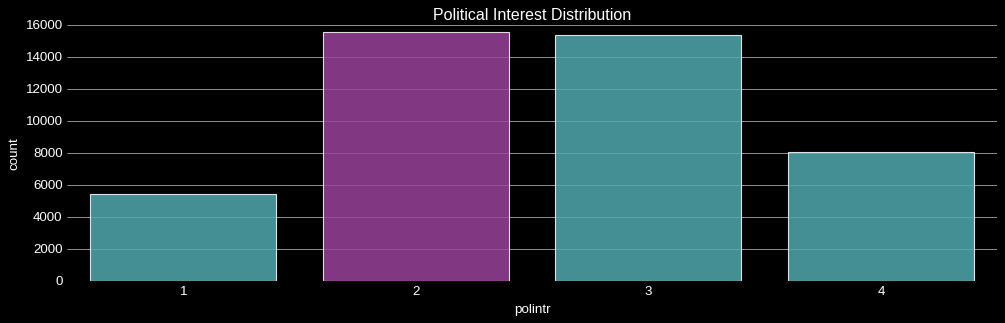

In [1154]:
plt.figure(figsize=(15,4))
plt.title('Political Interest Distribution')
sns.countplot(data['polintr'], dodge=False, palette=['#42b7bd','#a834a8','#42b7bd','#42b7bd'], alpha=.85)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-package

Text(0, 0.5, 'Trust in the UN')

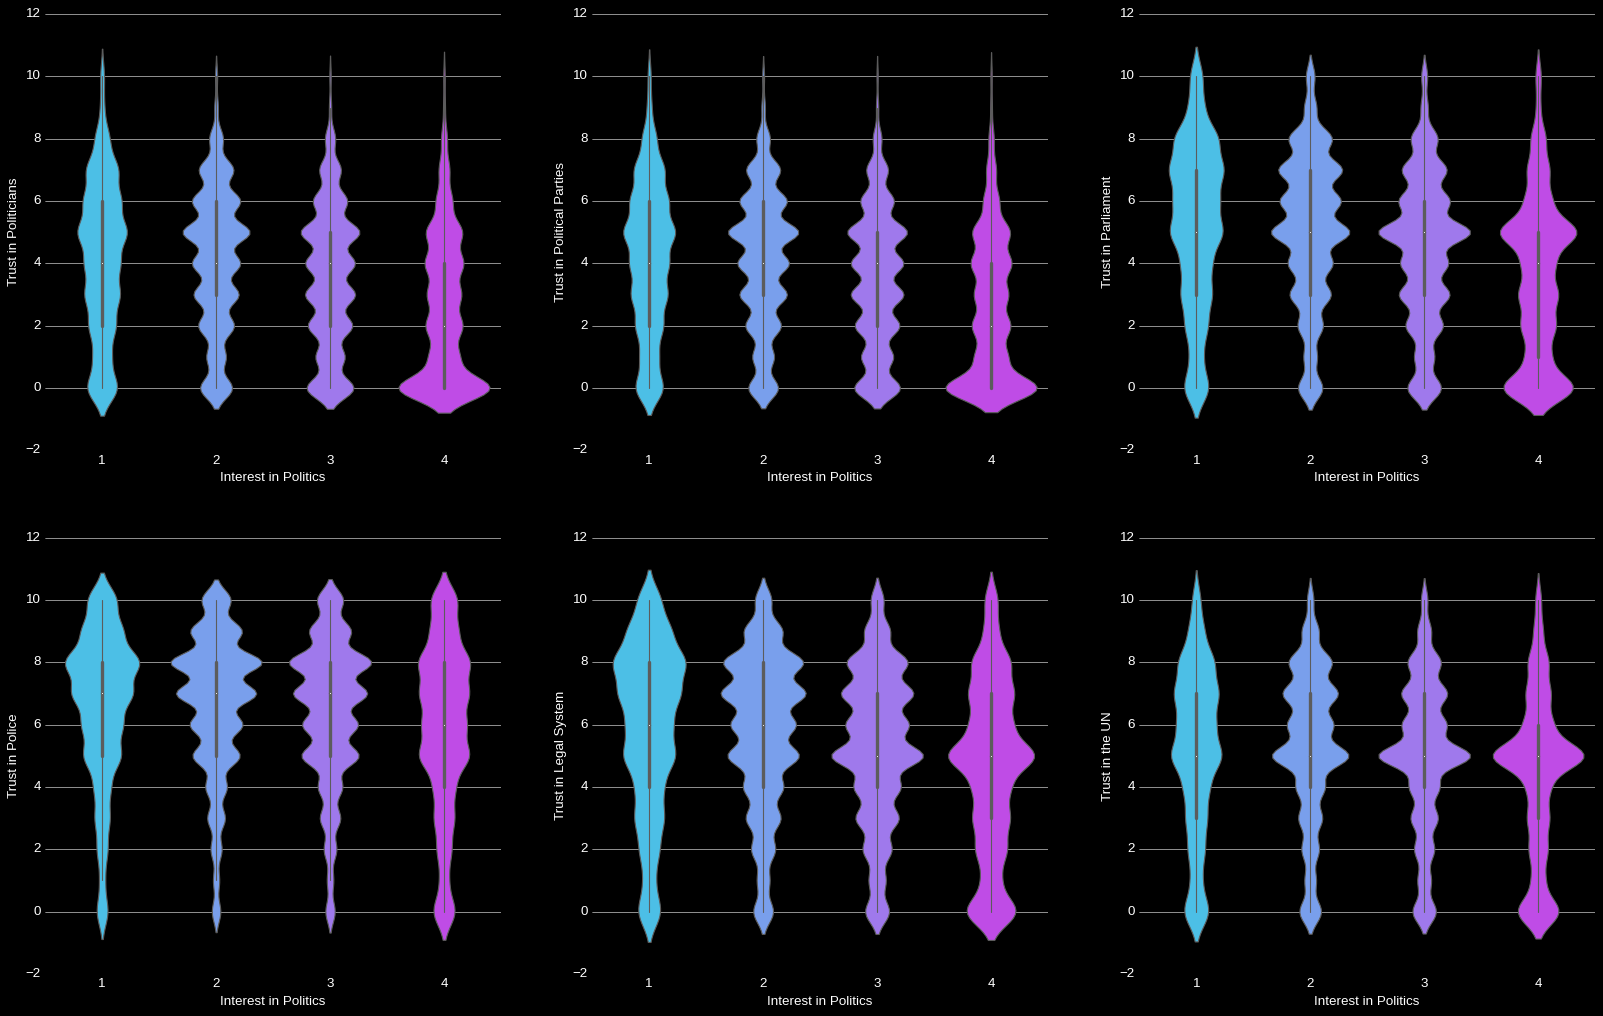

In [1233]:


fig, axs = plt.subplots(2, 3, figsize=(25,15))
ax1 = sns.violinplot(data['polintr'],data['trstplt'], palette='cool',ax=axs[0,0])
ax1.set_xlabel('Interest in Politics')
ax1.set_ylabel('Trust in Politicians')

ax2 = sns.violinplot(data['polintr'],data['trstprt'], palette='cool',ax=axs[0,1])
ax2.set_xlabel('Interest in Politics')
ax2.set_ylabel('Trust in Political Parties')

ax3 = sns.violinplot(data['polintr'],data['trstprl'], palette='cool',ax=axs[0,2])
ax3.set_xlabel('Interest in Politics')
ax3.set_ylabel('Trust in Parliament')

ax4 = sns.violinplot(data['polintr'],data['trstplc'], palette='cool',ax=axs[1,0])
ax4.set_xlabel('Interest in Politics')
ax4.set_ylabel('Trust in Police')

ax5 = sns.violinplot(data['polintr'],data['trstlgl'], palette='cool',ax=axs[1,1])
ax5.set_xlabel('Interest in Politics')
ax5.set_ylabel('Trust in Legal System')

ax6 = sns.violinplot(data['polintr'],data['trstun'], palette='cool',ax=axs[1,2])
ax6.set_xlabel('Interest in Politics')
ax6.set_ylabel('Trust in the UN')



/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 0, 'Life Satisfaction')

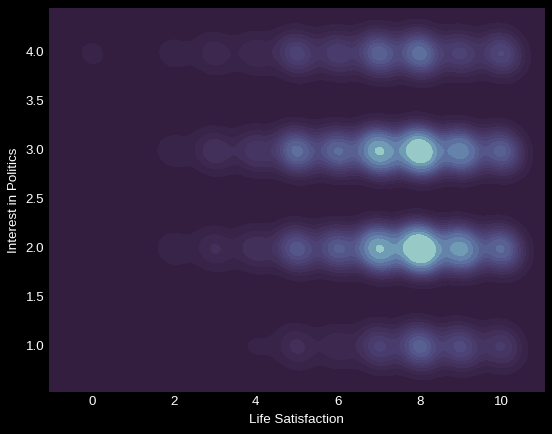

In [1205]:
cmap = sns.cubehelix_palette(start=.5, rot=-.5, as_cmap=True, reverse=True)
ax = sns.kdeplot(data['stflife'],data['polintr'], cmap=cmap, fill=True,
        thresh=0, levels=15)
ax.set_ylabel('Interest in Politics')
ax.set_xlabel('Life Satisfaction')

Most people would report that their life satisfaction in a 1-10 scale is 8 and this people would also be in the middle of the political interest spectrum.

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


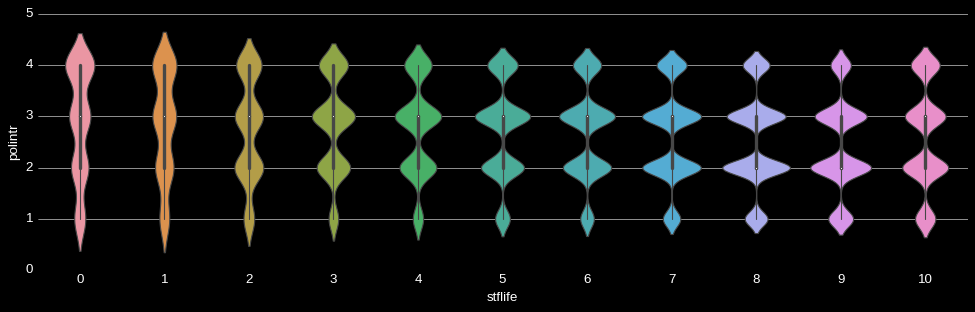

In [1235]:
plt.figure(figsize=(15,4))
sns.violinplot(data['stflife'],data['polintr'])